In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

from imblearn.over_sampling import SMOTE

%matplotlib inline

/Users/anupprakash/Anaconda4/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
data = pd.read_csv('Fraud_check.csv')

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
label = LabelEncoder()

In [5]:
data['Undergrad'] = label.fit_transform(data['Undergrad'])

In [6]:
data['Marital.Status'] = label.fit_transform(data['Marital.Status'])

In [7]:
data['Urban'] = label.fit_transform(data['Urban'])

In [8]:
data.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
5,0,0,33329,116382,0,0
6,0,0,83357,80890,8,1
7,1,2,62774,131253,3,1
8,0,2,83519,102481,12,1
9,1,0,98152,155482,4,1


In [9]:
# Adding new Column in DataFrame as Status where Taxable.Income is less than 30k
# taking as Risky (0)
# else Good (1)

data['Status']=0
for x in range(0,len(data)):
    if data['Taxable.Income'].iloc[x]<=30000:
        data['Status'].iloc[x] =  0
    else:
        data['Status'].iloc[x] = 1

In [10]:
#data['Taxable.Income'][data['Taxable.Income']<30000]

In [11]:
data.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Status
0,0,2,68833,50047,10,1,1
1,1,0,33700,134075,18,1,1
2,0,1,36925,160205,30,1,1
3,1,2,50190,193264,15,1,1
4,0,1,81002,27533,28,0,1
5,0,0,33329,116382,0,0,1
6,0,0,83357,80890,8,1,1
7,1,2,62774,131253,3,1,1
8,0,2,83519,102481,12,1,1
9,1,0,98152,155482,4,1,1


In [12]:
data.shape

(600, 7)

In [13]:
#sns.pairplot(data = data)

plt.show()

In [14]:
data.Status.value_counts()

1    476
0    124
Name: Status, dtype: int64

In [50]:
xTrain,xTest, yTrain,yTest = train_test_split(data.drop('Status',1),data.Status,test_size=0.2)

In [51]:
ss = SMOTE(k_neighbors=3)

In [52]:
xTrain,yTrain = ss.fit_sample(xTrain,yTrain)

In [53]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [54]:
dt = dt.fit(xTrain,yTrain)

In [55]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [56]:
yPred = dt.predict(xTest)

In [57]:
yPred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1])

In [58]:
Fraud = pd.DataFrame({'Actual':yTest,'Predicted':yPred})

In [59]:
confusion_matrix(Fraud.Actual,Fraud.Predicted)

array([[22,  0],
       [ 0, 98]])

In [60]:
print(classification_report(Fraud.Actual,Fraud.Predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        98

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



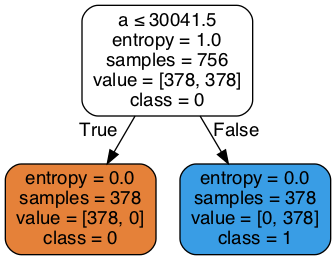

In [61]:
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data.columns[-1],class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

In [62]:
print(accuracy_score(yTest,yPred))

1.0
